<a href="https://colab.research.google.com/github/FatherOfLove/DataMining_project/blob/master/Data_Preprocessing_for_Airbnb_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/FatherOfLove/DataMining_project/master/data_lst_cutc.csv'
data = pd.read_csv(url)

data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,958.0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,2008-07-31,We are a family with 2 boys born in 2009 and 2...,within an hour,90%,t,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Lower Haight,Western Addition,San Francisco,CA,94117,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,1.0,30.0,199.0,97.0,10.0,10.0,10.0,10.0,9.0,t,moderate
1,3850.0,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",Here is the complete list of House Rules you a...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",These House Rules have money associated with t...,4921,2008-12-08,I am a retired software entrepreneur now raisi...,within an hour,100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Inner Sunset,Inner Sunset,San Francisco,CA,94131,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,NaN,NaN,$0.00,$10.00,1.0,5.0,136.0,94.0,9.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period
2,5858.0,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",8904,2009-03-02,Philip: English transplant to the Bay Area and...,within a day,67%,f,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Bernal Heights,Bernal Heights,San Francisco,CA,94110,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,"$1,600.00","$5,500.00",NaN,$100.00,30.0,60.0,111.0,98.0,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period
3,7918.0,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Please email your picture id with print name (...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...",21994,2009-06-17,7 minutes walk to UCSF. 15 minutes walk to US...,within an hour,100%,t,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Cole Valley,Haight Ashbury,San Francisco,CA,94117,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking..

# Feature Importance

In [0]:
d = data[['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights','price']]
d = d.dropna()
X = d[['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights']]  # Features
y=d['price']  # Labels
x_name = (['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights'])


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.07632933104631218


No handles with labels found to put in legend.


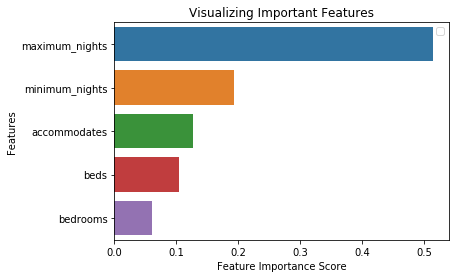

In [0]:
feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [0]:
data.shape

(7788, 50)

# NLP

In [0]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", str(raw_news))
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
# Creating new dataframe to store the text from the listings dataset
clean_listings = pd.DataFrame()

In [0]:
import time
import nltk
nltk.download('punkt')
nltk.download('wordnet')

#Cleaning listings name column dataset 

t1 = time.time()
clean_listings['name'] = data["name"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem listings name column data: \n", len(data), "dataset:", (t2-t1)/60, "min")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.

Time to clean, tokenize and stem listings name column data: 
 7788 dataset: 0.07124954064687093 min


In [0]:
colnames = ['name', 'summary', 'space', 'description',
            'neighborhood_overview', 'notes', 'transit',
            'access', 'interaction', 'house_rules', 
            'host_about', 'host_verifications', 'amenities']

In [0]:
def clean_df(colname):
  print(colname)
  clean_listings[colname] = data[colname].apply(cleaning)

for i in range(len(colnames)):
  print(i)
  clean_df(colnames[i])


0
name
1
summary
2
space
3
description
4
neighborhood_overview
5
notes
6
transit
7
access
8
interaction
9
house_rules
10
host_about
11
host_verifications
12
amenities


In [0]:
clean_listings.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,host_verifications,amenities
0,bright modern garden unit br b,new updat hous next door construct possibl noi...,newli remodel modern bright garden unit histor...,new updat hous next door construct possibl noi...,quiet cul de sac friend neighborhood step away...,due fact child dog earli footstep paw heard ap...,public transport block away central locat easi...,full access patio backyard share u dog live up...,famili life upstair dog normal abl meet guest ...,pet even visit guest short time period smoker ...,famili boy born new puppi feb name tucker part...,email phone facebook review kba,tv cabl tv internet wifi kitchen pet live prop...
1,charm room two,privat room plus access share bathroom across ...,first room rent airbnb start decemb infer url ...,privat room plus access share bathroom across ...,quiet safe neighborhood substanti san francisc...,complet list hous rule agre order book stay ru...,public transit servic hous outstand muni bus s...,hour access live room dine area kitchen condit...,live hous bedroom work home around answer ques...,hous rule money associ present summari format ...,retir softwar entrepreneur rais famili welcom ...,email phone review jumio govern id,internet wifi kitchen breakfast free street pa...
2,creativ sanctuari,nan,live larg victorian hous quiet street nestl mi...,live larg victorian hous quiet street nestl mi...,love neighborhood feel quiet close lot hustl b...,furnitur hous handmad special feel love live h...,train two block away stop get coffe way,deck garden gourmet kitchen extens art design ...,nan,pleas respect hous art work furnitur fun,philip english transplant bay area half spanis...,email phone review kba work email,internet wifi kitchen heat famili kid friend w...
3,friend room ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view room sink wi fi inner s...,nice good public transport minut walk ucsf min...,shop old town restaur mcdonald whole food targ...,pleas email pictur id print name sf school res...,n juda muni bus stop street park,nan,nan,parti smoke kind smoke candl tourist transient,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...
4,friend room apt style ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view rm wi fi tv sink larg e...,nice good public transport minut walk ucsf min...,nan,pleas email pictur id print name sf school res...,n juda muni bus ucsf shuttl small shop town mc...,nan,nan,pet smoke parti insid build,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
clean_listings = pd.read_csv('/content/drive/My Drive/CMPE 255/Project/Datasets/clean.csv')

In [0]:
clean_listings

,Unnamed: 0,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,host_verifications,amenities
0,0,bright modern garden unit br b,new updat hous next door construct possibl noi...,newli remodel modern bright garden unit histor...,new updat hous next door construct possibl noi...,quiet cul de sac friend neighborhood step away...,due fact child dog earli footstep paw heard ap...,public transport block away central locat easi...,full access patio backyard share u dog live up...,famili life upstair dog normal abl meet guest ...,pet even visit guest short time period smoker ...,famili boy born new puppi feb name tucker part...,email phone facebook review kba,tv cabl tv internet wifi kitchen pet live prop...
1,1,charm room two,privat room plus access share bathroom across ...,first room rent airbnb start decemb infer url ...,privat room plus access share bathroom across ...,quiet safe neighborhood substanti san francisc...,complet list hous rule agre order book stay ru...,public transit servic hous outstand muni bus s...,hour access live room dine area kitchen condit...,live hous bedroom work home around answer ques...,hous rule money associ present summari format ...,retir softwar entrepreneur rais famili welcom ...,email phone review jumio govern id,internet wifi kitchen breakfast free street pa...
2,2,creativ sanctuari,NaN,live larg victorian hous quiet street nestl mi...,live larg victorian hous quiet street nestl mi...,love neighborhood feel quiet close lot hustl b...,furnitur hous handmad special feel love live h...,train two block away stop get coffe way,deck garden gourmet kitchen extens art design ...,NaN,pleas respect hous art work furnitur fun,philip english transplant bay area half spanis...,email phone review kba work email,internet wifi kitchen heat famili kid friend w...
3,3,friend room ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view room sink wi fi inner s...,nice good public transport minut walk ucsf min...,shop old town restaur mcdonald whole food targ...,pleas email pictur id print name sf school res...,n juda muni bus stop street park,NaN,NaN,parti smoke kind smoke candl tourist transient,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...
4,4,friend room apt style ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view rm wi fi tv sink larg e...,nice good public transport minut walk ucsf min...,NaN,pleas email pictur id print name sf school res...,n juda muni bus ucsf shuttl small shop town mc...,NaN,NaN,pet smoke parti insid build,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,7783,bedroom hous beach clean conveni,renov bedroom bath home garag perfect busi tri...,main floor bedroom bathroom kitchen live room ...,renov bedroom bath home garag perfect busi tri...,NaN,NaN,NaN,NaN,away properti often travel work alway avail ph...,quiet hour pm event parti drug excess nois,welcom san francisco look forward host propert...,email phone facebook review offlin govern id k...,tv wifi kitchen free park premis free street p...
7784,7784,bedroom bath privat guest suit w st park,comfort relax bedroom bath guest suit locat st...,free park front home guest park self checkin s...,comfort relax bedroom bath guest suit locat st...,quiet peac neighborhood visit sf,NaN,minut interst highway sfo airport downtown sf ...,NaN,host famili life upstair hous quiet brunch wor...,quiet hour pm weekday midnight weekend shoeles...,hardwork unit state mailman love travel famili,email phone,tv cabl tv wifi indoor fireplac heat smoke det...
7785,7785,one kind san francisco victorian turret room,step back time san francisco victorian find be...,step privat space within one k

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [0]:
clean_listings = clean_listings.dropna(subset=['name'])
clean_listings.reset_index(drop=True)

,Unnamed: 0,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,host_verifications,amenities
0,0,bright modern garden unit br b,new updat hous next door construct possibl noi...,newli remodel modern bright garden unit histor...,new updat hous next door construct possibl noi...,quiet cul de sac friend neighborhood step away...,due fact child dog earli footstep paw heard ap...,public transport block away central locat easi...,full access patio backyard share u dog live up...,famili life upstair dog normal abl meet guest ...,pet even visit guest short time period smoker ...,famili boy born new puppi feb name tucker part...,email phone facebook review kba,tv cabl tv internet wifi kitchen pet live prop...
1,1,charm room two,privat room plus access share bathroom across ...,first room rent airbnb start decemb infer url ...,privat room plus access share bathroom across ...,quiet safe neighborhood substanti san francisc...,complet list hous rule agre order book stay ru...,public transit servic hous outstand muni bus s...,hour access live room dine area kitchen condit...,live hous bedroom work home around answer ques...,hous rule money associ present summari format ...,retir softwar entrepreneur rais famili welcom ...,email phone review jumio govern id,internet wifi kitchen breakfast free street pa...
2,2,creativ sanctuari,NaN,live larg victorian hous quiet street nestl mi...,live larg victorian hous quiet street nestl mi...,love neighborhood feel quiet close lot hustl b...,furnitur hous handmad special feel love live h...,train two block away stop get coffe way,deck garden gourmet kitchen extens art design ...,NaN,pleas respect hous art work furnitur fun,philip english transplant bay area half spanis...,email phone review kba work email,internet wifi kitchen heat famili kid friend w...
3,3,friend room ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view room sink wi fi inner s...,nice good public transport minut walk ucsf min...,shop old town restaur mcdonald whole food targ...,pleas email pictur id print name sf school res...,n juda muni bus stop street park,NaN,NaN,parti smoke kind smoke candl tourist transient,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...
4,4,friend room apt style ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view rm wi fi tv sink larg e...,nice good public transport minut walk ucsf min...,NaN,pleas email pictur id print name sf school res...,n juda muni bus ucsf shuttl small shop town mc...,NaN,NaN,pet smoke parti insid build,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,7783,bedroom hous beach clean conveni,renov bedroom bath home garag perfect busi tri...,main floor bedroom bathroom kitchen live room ...,renov bedroom bath home garag perfect busi tri...,NaN,NaN,NaN,NaN,away properti often travel work alway avail ph...,quiet hour pm event parti drug excess nois,welcom san francisco look forward host propert...,email phone facebook review offlin govern id k...,tv wifi kitchen free park premis free street p...
7780,7784,bedroom bath privat guest suit w st park,comfort relax bedroom bath guest suit locat st...,free park front home guest park self checkin s...,comfort relax bedroom bath guest suit locat st...,quiet peac neighborhood visit sf,NaN,minut interst highway sfo airport downtown sf ...,NaN,host famili life upstair hous quiet brunch wor...,quiet hour pm weekday midnight weekend shoeles...,hardwork unit state mailman love travel famili,email phone,tv cabl tv wifi indoor fireplac heat smoke det...
7781,7785,one kind san francisco victorian turret room,step back time san francisco victorian find be...,step privat space within one k

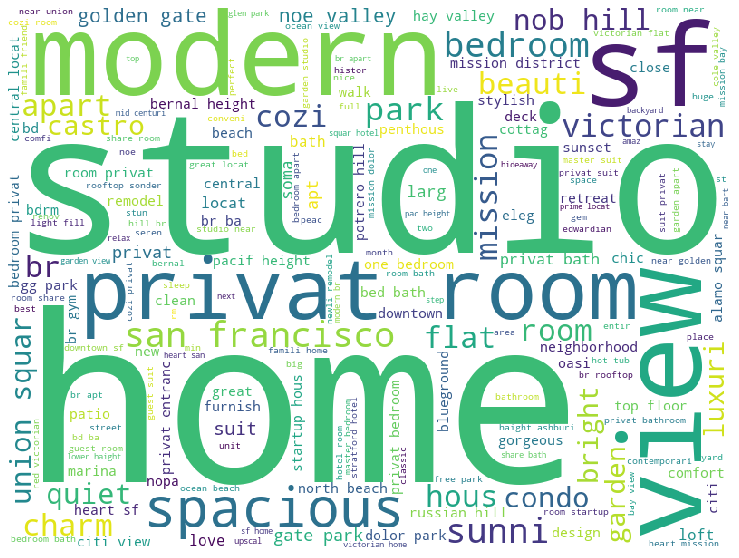

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# word cloud for name
cloud(' '.join(clean_listings['name']))

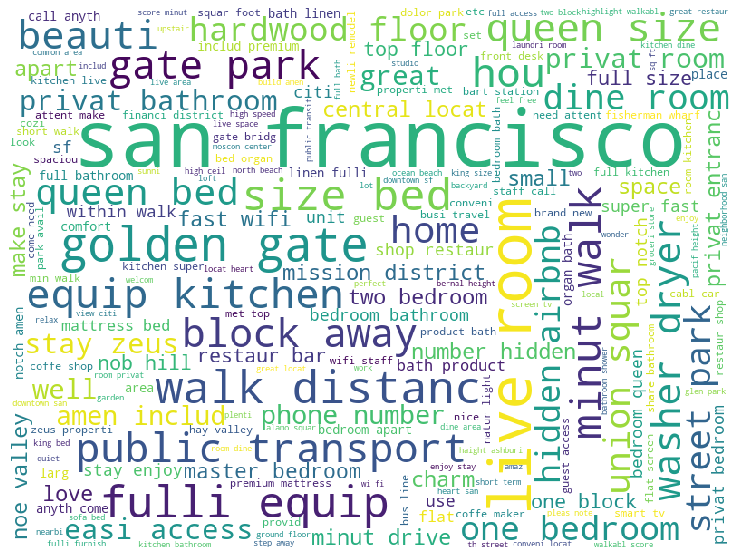

In [0]:
clean_listings = clean_listings.dropna(subset=['description'])
clean_listings.reset_index(drop=True)


# word cloud for description
cloud(' '.join(clean_listings['description']))

In [0]:
clean_listings['content'] = clean_listings[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)
clean_listings.head()

,Unnamed: 0,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,host_verifications,amenities,content
0,0,bright modern garden unit br b,new updat hous next door construct possibl noi...,newli remodel modern bright garden unit histor...,new updat hous next door construct possibl noi...,quiet cul de sac friend neighborhood step away...,due fact child dog earli footstep paw heard ap...,public transport block away central locat easi...,full access patio backyard share u dog live up...,famili life upstair dog normal abl meet guest ...,pet even visit guest short time period smoker ...,famili boy born new puppi feb name tucker part...,email phone facebook review kba,tv cabl tv internet wifi kitchen pet live prop...,bright modern garden unit br b // new updat ho...
1,1,charm room two,privat room plus access share bathroom across ...,first room rent airbnb start decemb infer url ...,privat room plus access share bathroom across ...,quiet safe neighborhood substanti san francisc...,complet list hous rule agre order book stay ru...,public transit servic hous outstand muni bus s...,hour access live room dine area kitchen condit...,live hous bedroom work home around answer ques...,hous rule money associ present summari format ...,retir softwar entrepreneur rais famili welcom ...,email phone review jumio govern id,internet wifi kitchen breakfast free street pa...,charm room two // privat room plus access shar...
2,2,creativ sanctuari,NaN,live larg victorian hous quiet street nestl mi...,live larg victorian hous quiet street nestl mi...,love neighborhood feel quiet close lot hustl b...,furnitur hous handmad special feel love live h...,train two block away stop get coffe way,deck garden gourmet kitchen extens art design ...,NaN,pleas respect hous art work furnitur fun,philip english transplant bay area half spanis...,email phone review kba work email,internet wifi kitchen heat famili kid friend w...,creativ sanctuari // live larg victorian hous ...
3,3,friend room ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view room sink wi fi inner s...,nice good public transport minut walk ucsf min...,shop old town restaur mcdonald whole food targ...,pleas email pictur id print name sf school res...,n juda muni bus stop street park,NaN,NaN,parti smoke kind smoke candl tourist transient,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...,friend room ucsf usf san francisco // nice goo...
4,4,friend room apt style ucsf usf san francisco,nice good public transport minut walk ucsf min...,room rental sunni view rm wi fi tv sink larg e...,nice good public transport minut walk ucsf min...,NaN,pleas email pictur id print name sf school res...,n juda muni bus ucsf shuttl small shop town mc...,NaN,NaN,pet smoke parti insid build,minut walk ucsf minut walk usf st mari hospit ...,email phone review jumio govern id,tv internet wifi kitchen free street park heat...,friend room apt style ucsf usf san francisco /...


# TFIDF


In [0]:
data['content'] = data[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)
data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,content
0,958.0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,2008-07-31,We are a family with 2 boys born in 2009 and 2...,within an hour,90%,t,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Lower Haight,Western Addition,San Francisco,CA,94117,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,1.0,30.0,199.0,97.0,10.0,10.0,10.0,10.0,9.0,t,moderate,"Bright, Modern Garden Unit - 1BR/1B // New upd..."
1,3850.0,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",Here is the complete list of House Rules you a...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",These House Rules have money associated with t...,4921,2008-12-08,I am a retired software entrepreneur now raisi...,within an hour,100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Inner Sunset,Inner Sunset,San Francisco,CA,94131,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,NaN,NaN,$0.00,$10.00,1.0,5.0,136.0,94.0,9.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,Charming room for two // Your own private room...
2,5858.0,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",8904,2009-03-02,Philip: English transplant to the Bay Area and...,within a day,67%,f,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Bernal Heights,Bernal Heights,San Francisco,CA,94110,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,"$1,600.00","$5,500.00",NaN,$100.00,30.0,60.0,111.0,98.0,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,Creative Sanctuary // We live in a large Victo...
3,7918.0,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Please email your picture id with print name (...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...",21994,2009-06-17,7 minutes walk to UCSF. 15 minutes walk to US...,within an hour,100%,t,10.0,"['email', 'phone', 'reviews', 'jumio', 'gov

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(clean_listings['content'])

In [0]:
tfidf_matrix

<7752x176981 sparse matrix of type '<class 'numpy.float64'>'
	with 1182009 stored elements in Compressed Sparse Row format>

In [0]:
input = ['bright moder']

In [0]:
tf = tf.fit_transform(input)

In [0]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(data['content'])

In [0]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [0]:
results = {}
for idx, row in data.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], data['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [0]:
results[3850.0][0]

(0.3798095728300849, 1393654.0)

In [0]:
def item(id):
    name   = data.loc[data['id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + data.loc[data['id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')

In [0]:
recommend(item_id = 3850.0, num = 5)


Recommending 5 products similar to Charming room for two 
Description: Your own private room plus access to a shared bathroom across the hall. House is on a big hill with a great view. Plenty of 72-hour free parking in front. Free maps,...
---

Recommended: Quiet house in geo center of City 
Description: Your own private room and a shared bathroom down the hall. House is on a hill with a great view. Plenty of 72-hour free parking in front. Free maps, breakfast food a...
(score:0.3798095728300849)

Recommended: Lovely Garden Apt with Free Parking 
Description: Private entrance, beautiful 1 bedroom, 1 bath studio  that opens to the garden - and no kitchen so you don't even have to think about cooking! You can park your car ...
(score:0.23638873601253263)

Recommended: South Beach 2 BR with Views! 
Description: Description Completed in (Phone number hidden by Airbnb) , the Watermark is one of the most stylish buildings in vibrant South Beach. A 22-story tower set off the Sa...
(score:0.22

# Cosine Similarity #1

In [0]:
words = clean_listings['name']

In [0]:
query = 'modern ocean beach home hayes valley'

In [0]:
# Basing off https://stackoverflow.com/questions/44862712/td-idf-find-cosine-similarity-between-new-document-and-dataset
from sklearn.metrics.pairwise import cosine_similarity

tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(clean_listings['name'])



# datasetTFIDF = TfidfVectorizer()
queryTFIDF = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english').fit(clean_listings['name'])
queryTFIDF = queryTFIDF.transform([query])
cosine_similarities = cosine_similarity(queryTFIDF, tfidf_matrix).flatten()
related_product_indices = cosine_similarities.argsort()[:-11:-1]


In [95]:
related_product_indices.shape

(10,)

In [96]:
result = pd.DataFrame( clean_listings.iloc[related_product_indices[0].reshape(1)] )
# clean_listings.iloc[related_product_indices[0]]
result

,Unnamed: 0,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,host_verifications,amenities,content
1936,1936,beauti br ocean beach home,uniqu opportun stay pacif ocean block away com...,come experi privat spacious well appoint beach...,uniqu opportun stay pacif ocean block away com...,come experi beach town citi ocean beach block ...,beach hous quiet residenti neighborhood sf loc...,public transport follow muni line n judah trai...,hous offer follow amen bedroom queen bed plush...,NaN,beach hous quiet residenti neighborhood sf loc...,love connect empow peopl support friend entrep...,email phone facebook review kba,tv internet wifi kitchen free park premis pet ...,beauti br ocean beach home // uniqu opportun s...


# Cosine Similarity

In [0]:
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

In [0]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df


,after,as,became,by,career,claimed,do,earlier,election,elections,friend,friends,had,he,his,in,interference,is,it,lost,minister,mr,no,nothing,of,outcome,parties,political,post,president,prime,putin,republican,russia,says,served,some,support,the,though,to,trump,vladimir,was,who,winning,witchhunt,with
doc_trump,1,0,1,0,0,0,0,0,1,0,0,2,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,2,0,1,1,0,0,0,1,1,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,1,0,1,1,0,2,0,1,0,2,2,0,0,1,2,1,0,0,0,1,1,0,1,1,2,0,2,0,2,0,0,2,0,0,0,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,2,1,2,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [0]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.51480485 0.38890873]
 [0.51480485 1.         0.38829014]
 [0.38890873 0.38829014 1.        ]]


In [0]:
new = pd.DataFrame({"name":['Modern Home']})
new.head()

,name
0,Modern Home


In [0]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(clean_listings['name'])
doc_term_matrix = sparse_matrix.todense()
df1 = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names())


sparse_matrix = count_vectorizer.fit_transform(new['name'])
doc_term_matrix = sparse_matrix.todense()
df2 = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names())


print(cosine_similarity(pd.DataFrame(df.iloc[1].values.reshape(1,-1)), df2))

ValueError: ignored

In [0]:
df1

,aa,ab,abbey,abl,abod,absolut,abund,ac,access,accommod,accordion,accout,ace,across,action,addit,adjoin,adob,ador,adtl,adventur,afford,affort,afternoon,ah,air,airbnb,airi,airport,alamo,alamosquar,alcatraz,alcov,alic,alley,allso,alon,also,altar,alway,...,willow,wind,window,windsor,wine,wing,winter,wire,wireless,within,without,wnh,wonder,wood,wooden,work,workspac,workstat,world,worldmark,wow,wrap,wtwin,wyndham,xl,xmas,xqczf,yacht,yard,year,yellow,yerba,yet,yoga,york,young,zen,zeus,zoo,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Topic Modeling

In [0]:
clean = clean_listings
clean.head()

,name
0,bright modern garden unit br b
1,charm room two
2,creativ sanctuari
3,friend room ucsf usf san francisco
4,friend room apt style ucsf usf san francisco


##### create a dictionary that will contain tokens from the dataset with text 

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result


In [0]:
# Method to create a dictionary given the dataframe and column name
def get_dictionary_print_words(dataframe,colname):
    w = dataframe[colname].map(lambda doc: doc.split(" "))
    dictionary_gensim = gensim.corpora.Dictionary(w)
    tokenized_docs_local = dataframe[colname].map(get_word_tokens)
    count = 0
    print('Dictionary words and occurrences')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 20:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

In [0]:
# Get bag of words
def get_bow_corpus(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    return bow_corpus_local, dictionary_gensim

In [0]:
clean.head

<bound method NDFrame.head of                                               name
0                   bright modern garden unit br b
1                                   charm room two
2                                creativ sanctuari
3               friend room ucsf usf san francisco
4     friend room apt style ucsf usf san francisco
...                                            ...
7783              bedroom hous beach clean conveni
7784      bedroom bath privat guest suit w st park
7785  one kind san francisco victorian turret room
7786                       san francisco b b apart
7787                      nice privat bedroom park

[7788 rows x 1 columns]>

In [0]:
get_dictionary_print_words(clean[:1], 'name')

Dictionary words and occurrences
0 b
1 br
2 bright
3 garden
4 modern
5 unit


(<gensim.corpora.dictionary.Dictionary at 0x7f7a3c8d0278>,
 0    [bright, modern, garden, unit]
 Name: name, dtype: object)

In [0]:
get_bow_corpus(clean, 'name')

Dictionary words and occurrences
0 b
1 br
2 bright
3 garden
4 modern
5 unit
6 charm
7 room
8 two
9 creativ
10 sanctuari
11 francisco
12 friend
13 san
14 ucsf
15 usf
16 apt
17 style
18 alamo
19 histor
20 squar


([[(2, 1), (3, 1), (4, 1), (5, 1)],
  [(6, 1), (7, 1)],
  [(9, 1)],
  [(7, 1), (10, 1), (11, 1), (13, 1)],
  [(7, 1), (10, 1), (11, 1), (13, 1), (16, 1)],
  [(17, 1), (18, 1), (19, 1), (20, 1)],
  [(21, 1), (22, 1), (23, 1), (24, 1)],
  [(25, 1), (26, 1), (27, 1)],
  [(3, 1), (29, 1), (30, 1), (31, 1)],
  [(20, 1), (26, 1), (32, 1), (33, 1)],
  [(34, 1), (35, 1), (36, 1), (38, 1), (39, 1)],
  [(3, 1), (40, 1), (41, 1), (42, 1)],
  [(20, 1), (46, 1), (47, 1)],
  [(4, 1), (19, 1), (48, 1), (49, 1)],
  [(7, 1), (10, 1), (13, 1), (50, 1), (51, 1), (52, 1)],
  [(7, 1), (10, 1), (13, 1), (50, 1), (51, 1), (52, 1)],
  [(23, 1), (53, 1), (54, 1)],
  [(35, 1), (52, 1), (56, 1), (58, 1)],
  [],
  [(33, 1), (59, 1)],
  [(3, 1), (48, 1), (60, 1), (61, 1)],
  [(25, 1), (40, 1), (62, 1), (64, 1)],
  [(36, 1), (39, 1), (48, 1), (66, 1)],
  [(7, 1), (10, 1), (11, 1), (13, 1), (16, 1)],
  [(52, 1), (68, 1), (70, 1)],
  [(33, 1), (53, 1), (71, 1), (72, 1)],
  [(39, 1), (47, 1)],
  [(30, 1), (36, 1), (74

##### TFIDF
Create TFIDF model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’. Transformation is applied to the entire corpus. Finally, the TFIDF score is previewed for the first row document.

In [0]:
def tfidf_corpus(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n TFIDF Vector for First Row')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [0]:
bow_corpus_local, dictionary_gensim = get_bow_corpus(clean, 'name')
# get tfidf for the corpus
tfidf_corpus(bow_corpus_local)

Dictionary words and occurrences
0 b
1 br
2 bright
3 garden
4 modern
5 unit
6 charm
7 room
8 two
9 creativ
10 sanctuari
11 francisco
12 friend
13 san
14 ucsf
15 usf
16 apt
17 style
18 alamo
19 histor
20 squar

 TFIDF Vector for First Row
[(2, 0.4893170071896059),
 (3, 0.4207558046692619),
 (4, 0.37940811107935635),
 (5, 0.6630104860100812)]


In [0]:
# Run LDA model and print top topics
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus(clean, 'name')


Dictionary words and occurrences
0 b
1 br
2 bright
3 garden
4 modern
5 unit
6 charm
7 room
8 two
9 creativ
10 sanctuari
11 francisco
12 friend
13 san
14 ucsf
15 usf
16 apt
17 style
18 alamo
19 histor
20 squar


In [0]:
tfidf_corpus_headline = tfidf_corpus(bow_corpus_headline)


 TFIDF Vector for First Row
[(2, 0.4893170071896059),
 (3, 0.4207558046692619),
 (4, 0.37940811107935635),
 (5, 0.6630104860100812)]


In [0]:
get_lda_model_print_top_topics

<function __main__.get_lda_model_print_top_topics>

In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['squar', 'union', 'heart', 'hotel', 'studio', 'bright', 'room', 'sunni', 'garden', 'privat']
1::['apart', 'park', 'near', 'gate', 'golden', 'bedroom', 'mission', 'room', 'privat', 'sunni']
2::['francisco', 'hous', 'beach', 'startup', 'privat', 'ocean', 'room', 'home', 'eleg', 'bedroom']
3::['flat', 'locat', 'neighborhood', 'modern', 'great', 'hill', 'sunni', 'perfect', 'room', 'discount']
4::['room', 'privat', 'home', 'victorian', 'view', 'bath', 'charm', 'valley', 'suit', 'hous']
5::['height', 'bernal', 'apart', 'studio', 'garden', 'hill', 'privat', 'entranc', 'park', 'edwardian']
6::['hill', 'view', 'soma', 'blueground', 'modern', 'union', 'donatello', 'center', 'penthous', 'near']
7::['privat', 'mission', 'bathroom', 'studio', 'bedroom', 'remodel', 'district', 'pacif', 'light', 'luxuri']
8::['sonder', 'street', 'bedroom', 'view', 'citi', 'privat', 'modern', 'beauti', 'rooftop', 'condo']
9::['valley', 'victorian', 'room', 'cozi', 'share', 'spacious', 'queen', 'nopa', 'bedroom', '

# Sentiment Analysis

In [0]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')
import nltk
nltk.download('vader_lexicon')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


NameError: ignored